In [1]:
import sys
sys.path.append('src')

from collections import defaultdict
from pathlib import Path
import pandas as pd

from experiment import run_experiment, load_experiment,\
    plot_ranked_with_overfitting, plot_scores_splits, plot_predictions,\
    compare_models, build_compare_models_result,\
    plot_features_importance

In [2]:
aug_dataset = Path(R"data/aug_downsyndrom.csv")

if aug_dataset.exists():
    df_to_transform = pd.read_csv(aug_dataset, delimiter=";")
else:
    raise RuntimeError("Generate the file using the notebook agecancellationanalysis.ipynb")

# Set default paths
root = "results"

# Set default parameters
mode = "ratio"
scoring = "neg_mean_squared_error"
input_attribute = "Age (G+W)"
cv= 5
n_iter = 5
# important attributes
attributes_to_highlight = [
    "Immunoglobuline A (mg/dl)",
    "Homocysteine (µmol/L)",
    "Creatinina (mg/dl)",
    "CD19+ (PANB) /mmc",
    "Sphincter Control at month",
    "alanine",
    "Eritrociti (10^6/mmc)",
    "Started Walking at month",
    "Tireotropina (microIU/ml)",
    "Apgar Score 1'",
    "Height cm",
    "Weight Kg"
]
# create dict of list for collecting all results with function build_compare_models_result
groups_created = defaultdict(list)

In [3]:
# load experiment random forest
df_discounted_rfb, act_rfb = load_experiment(root, "RandomForest", ['baseline'])
df_discounted_rfmdne, act_rfmdne = load_experiment(root, "RandomForest", ['max_depth',"n_estimators"])
df_discounted_rfmae, act_rfmae = load_experiment(root, "RandomForest", ['mae'])
# load experiment extra trees
df_discounted_etb, act_etb = load_experiment(root, "ExtraTrees", ['baseline'])
df_discounted_etmdne, act_etmdne = load_experiment(root, "ExtraTrees", ['max_depth',"n_estimators"])
df_discounted_etmae, act_etmae = load_experiment(root, "ExtraTrees", ['mae'])
# load experiment neural network
df_discounted_nnb, act_nnb = load_experiment(root, "NeuralNetwork", ['baseline'])
df_discounted_nnh, act_nnh = load_experiment(root, "NeuralNetwork", ['hidden_layer_sizes'])

[INFO] experiment: Loading experiment RandomForest (results\RandomForest\baseline)
[INFO] experiment: Loading dataframe transformed...
[INFO] experiment: Loading transformer...
[INFO] experiment: Loading complete.
[INFO] experiment: Loading experiment RandomForest (results\RandomForest\max_depth_n_estimators)
[INFO] experiment: Loading dataframe transformed...
[INFO] experiment: Loading transformer...
[INFO] experiment: Loading complete.
[INFO] experiment: Loading experiment RandomForest (results\RandomForest\mae)
[INFO] experiment: Loading dataframe transformed...
[INFO] experiment: Loading transformer...
[INFO] experiment: Loading complete.
[INFO] experiment: Loading experiment ExtraTrees (results\ExtraTrees\baseline)
[INFO] experiment: Loading dataframe transformed...
[INFO] experiment: Loading transformer...
[INFO] experiment: Loading complete.
[INFO] experiment: Loading experiment ExtraTrees (results\ExtraTrees\max_depth_n_estimators)
[INFO] experiment: Loading dataframe transform

# Remove dependence of cronological age from attributes in order to predict the equivalent age of children affected by down syndrome and hence understand which metabolites will affect the children

The results of each model for speacified attributes

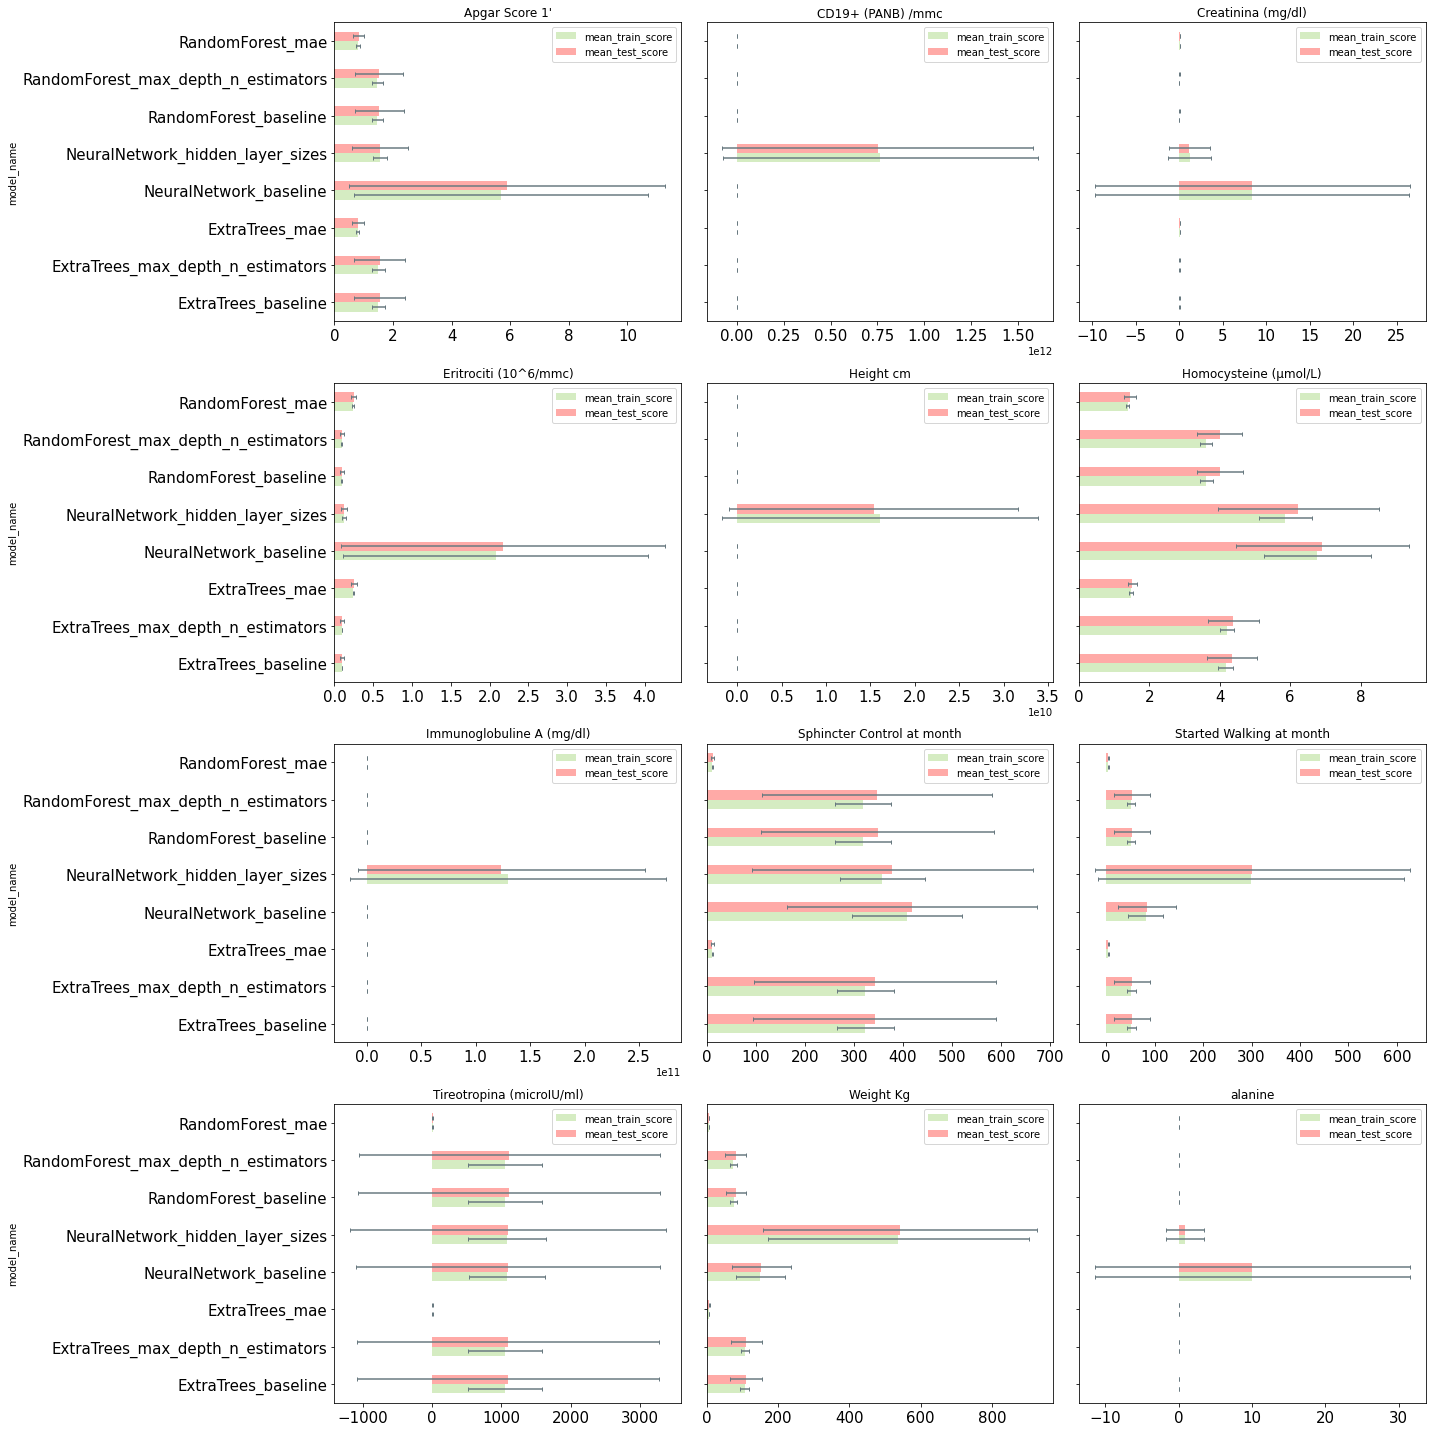

In [4]:
compare_models(highlight_attributes=attributes_to_highlight, load_cache_from_root='results')

## Let's see the results for specific models

Using MSE

Random forest using MSE

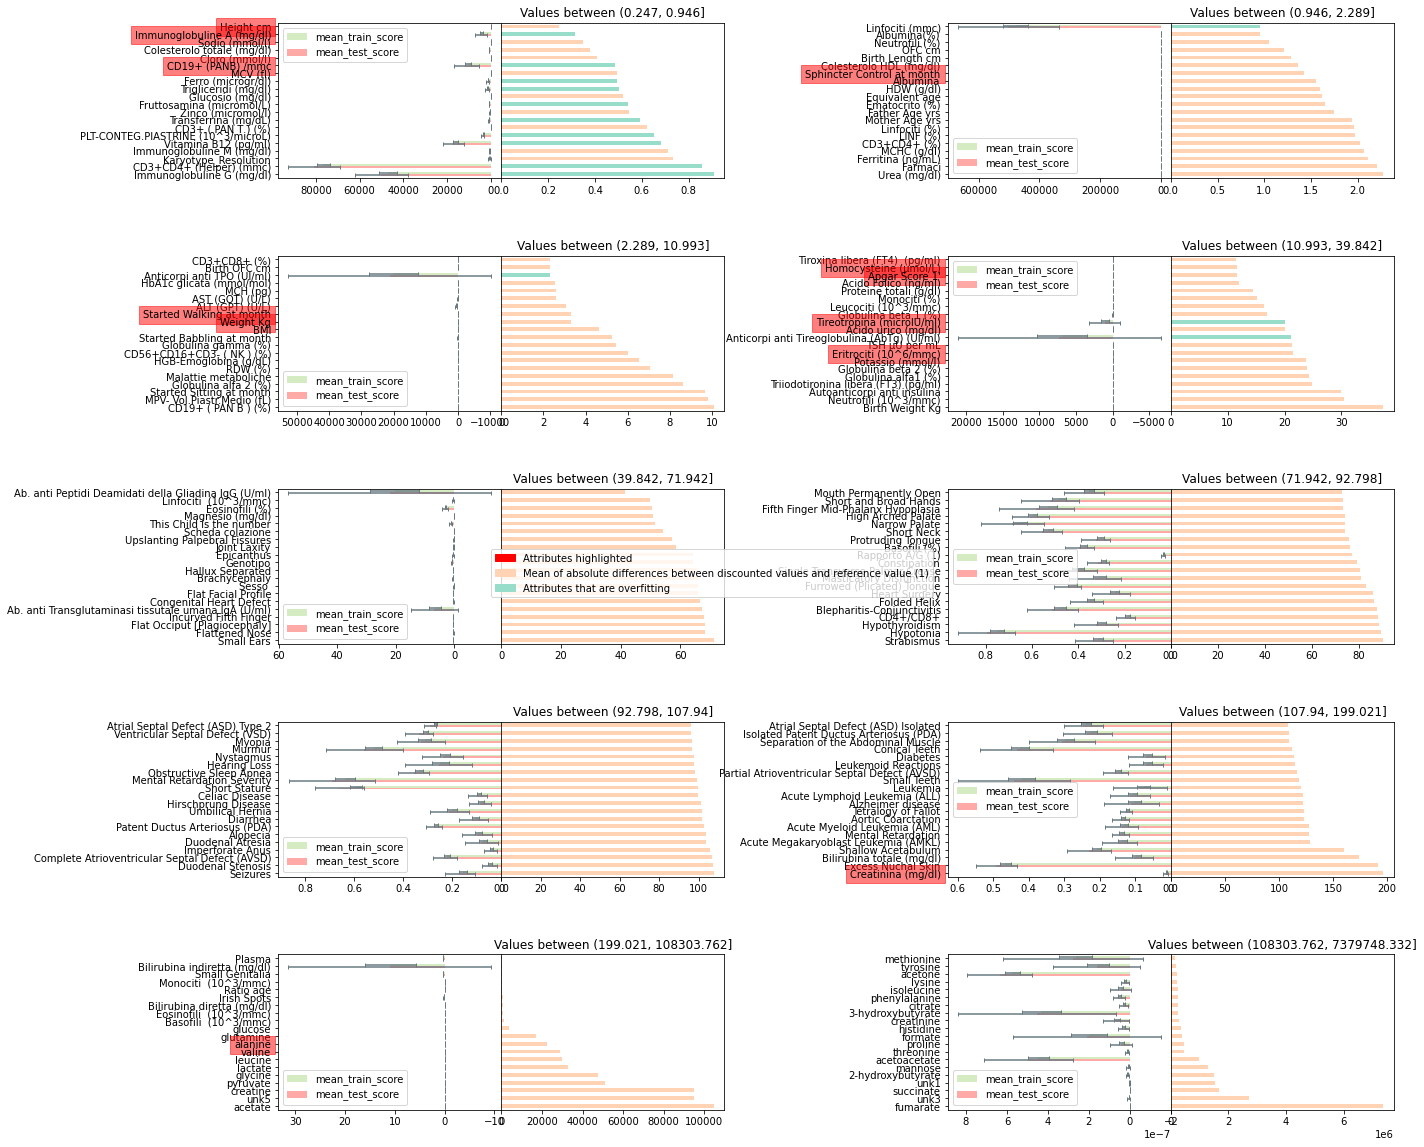

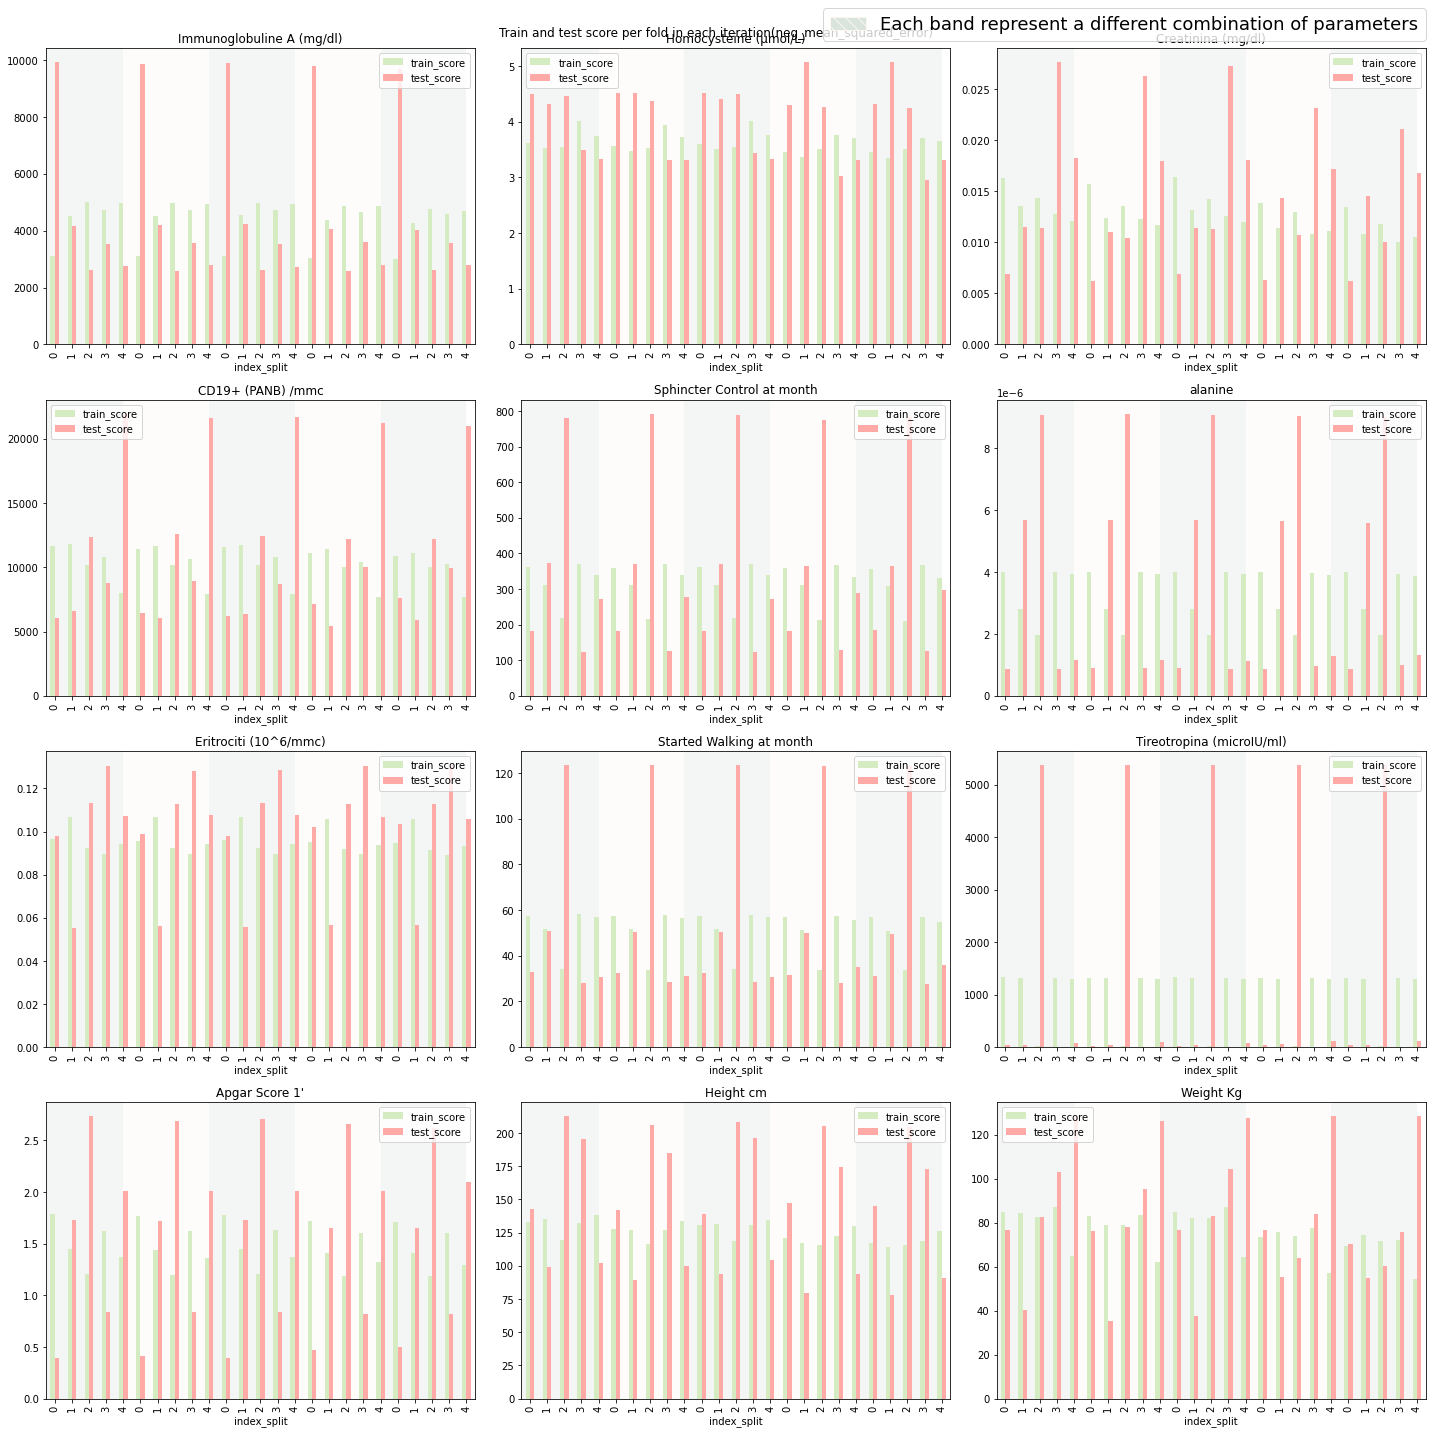

In [5]:
plot_ranked_with_overfitting(df_discounted_rfb,act_rfb,quantile=10,highlight_attributes=attributes_to_highlight)
plot_scores_splits(act_rfb, highlight_attributes=attributes_to_highlight)

Extra trees using MSE

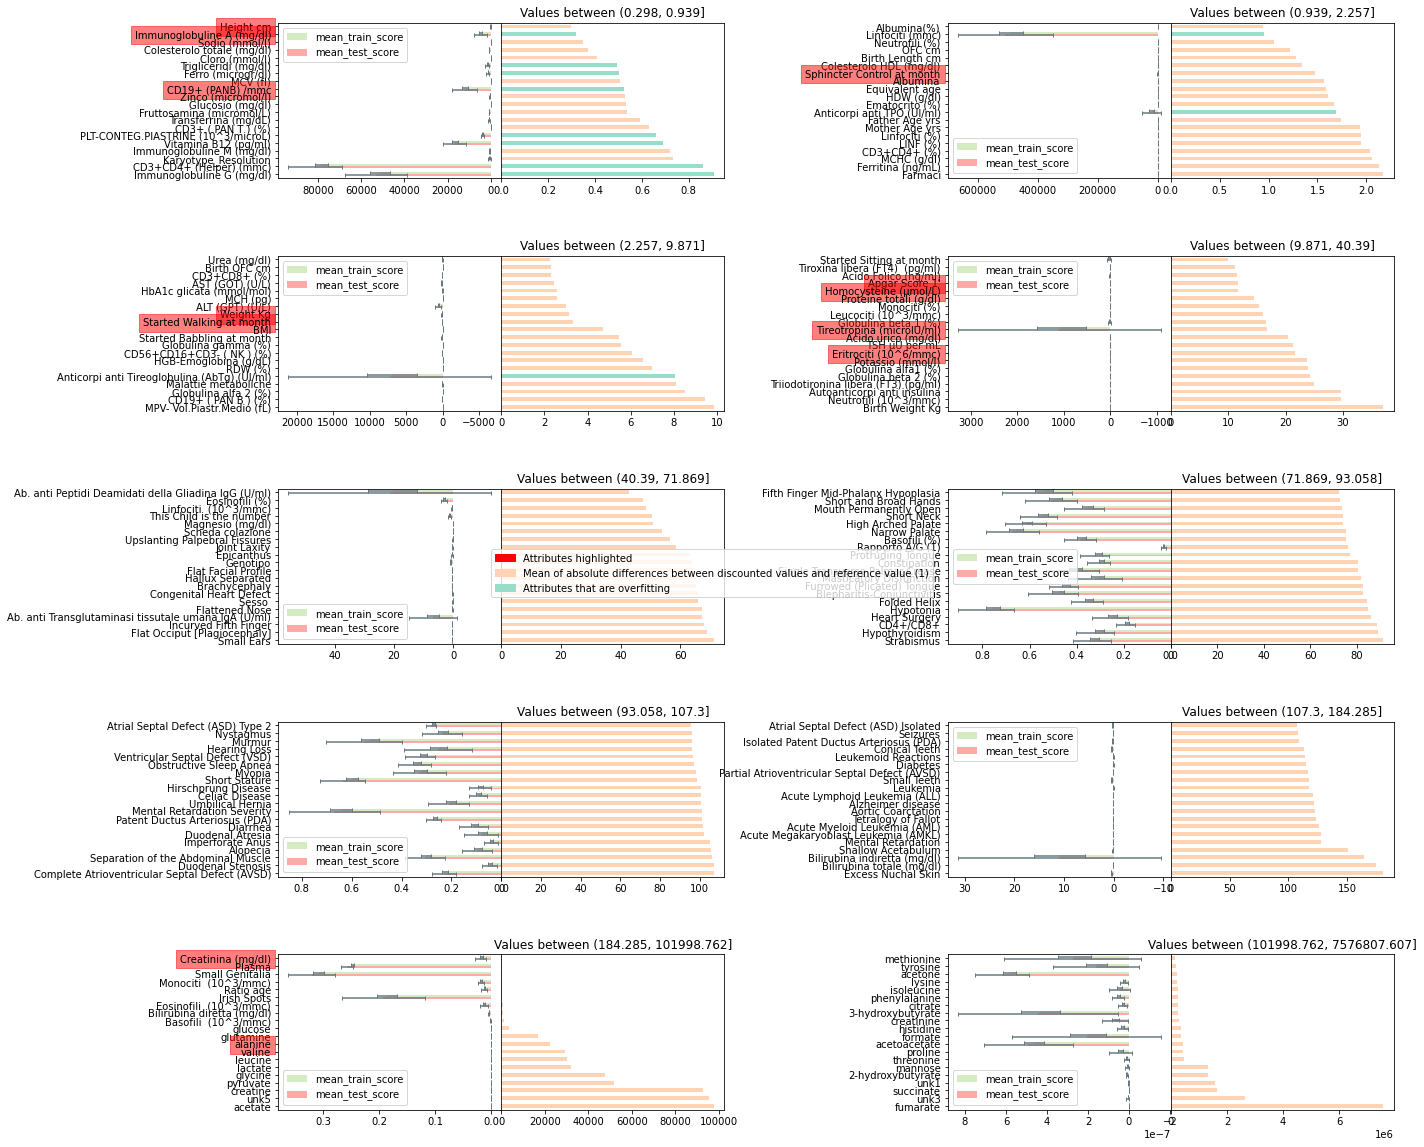

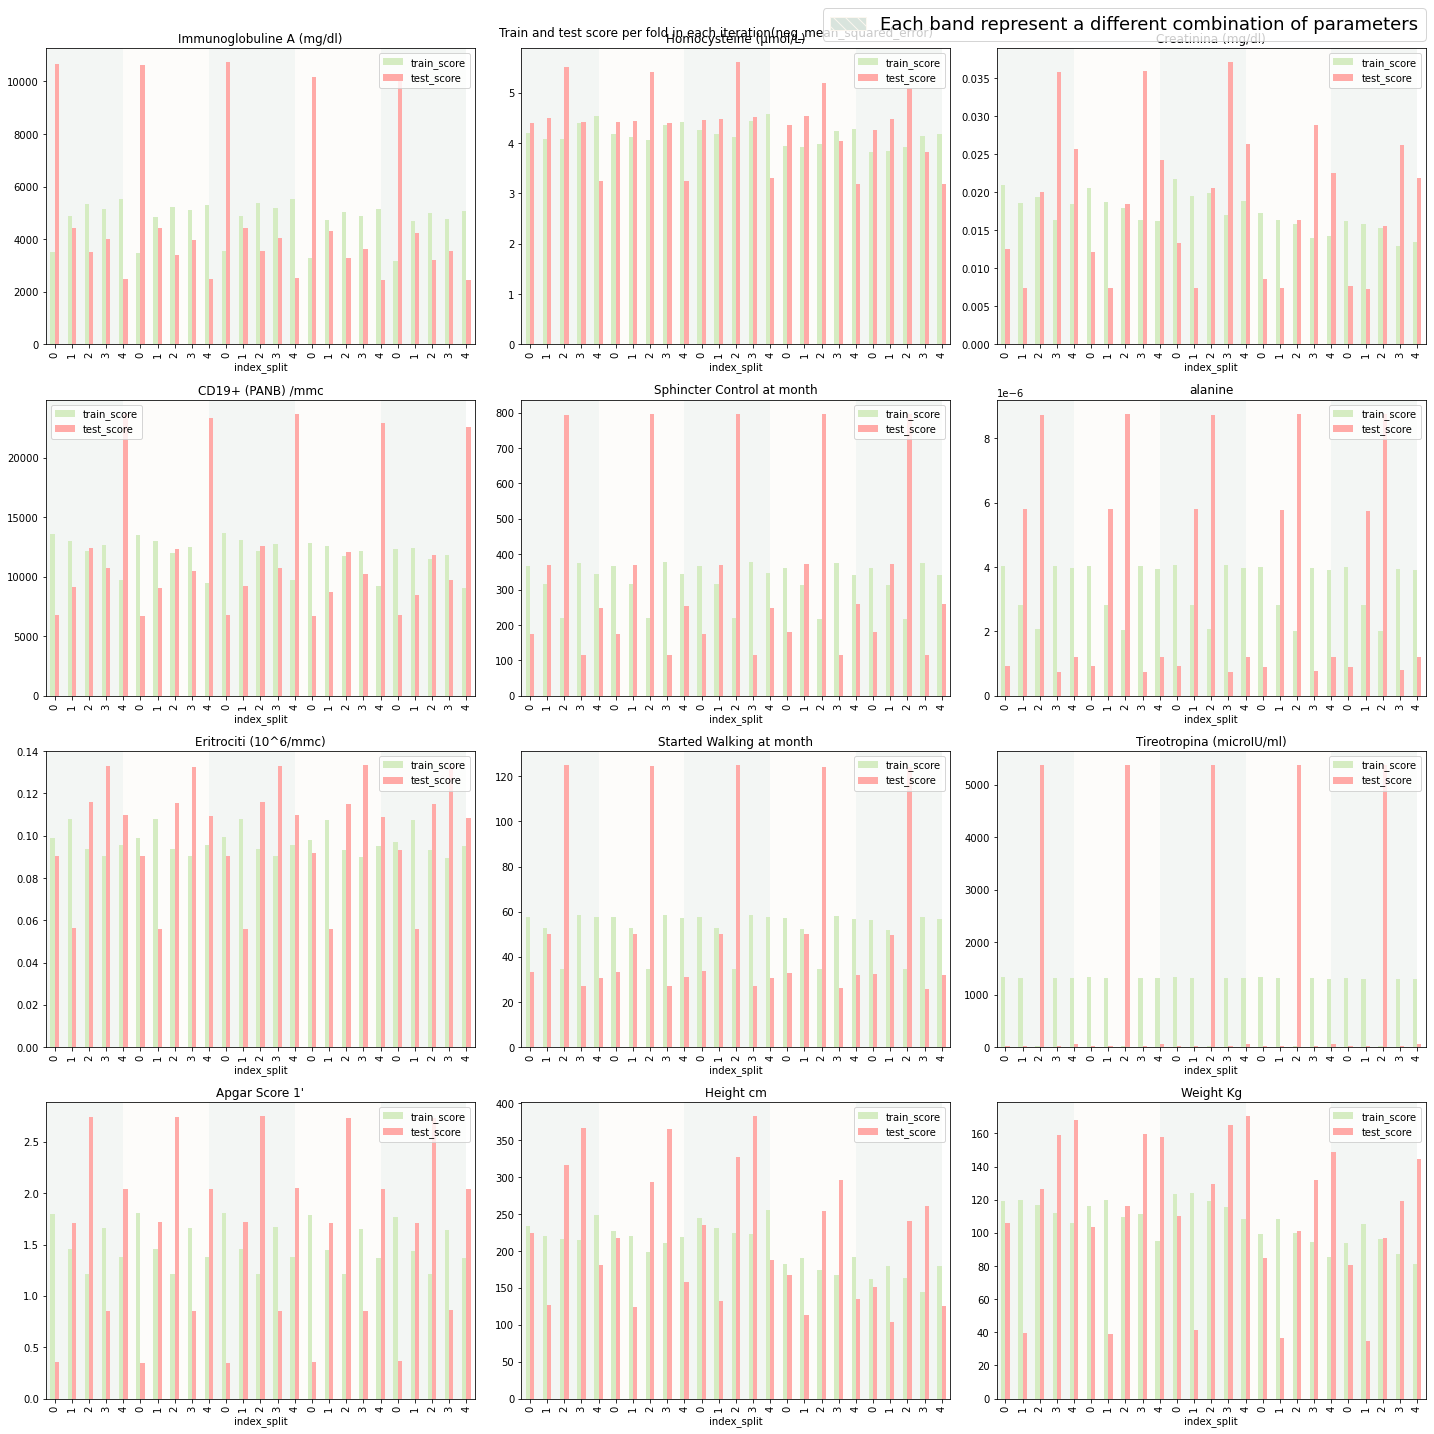

In [6]:
plot_ranked_with_overfitting(df_discounted_etb,act_etb,quantile=10,highlight_attributes=attributes_to_highlight)
plot_scores_splits(act_etb, highlight_attributes=attributes_to_highlight)

Using MAE

<div class="alert-danger">
ATTENTION: RandomForest and ExtraTrees are still fitted using MSE but the scores are computed using MAE
</div>


Random forest using MAE

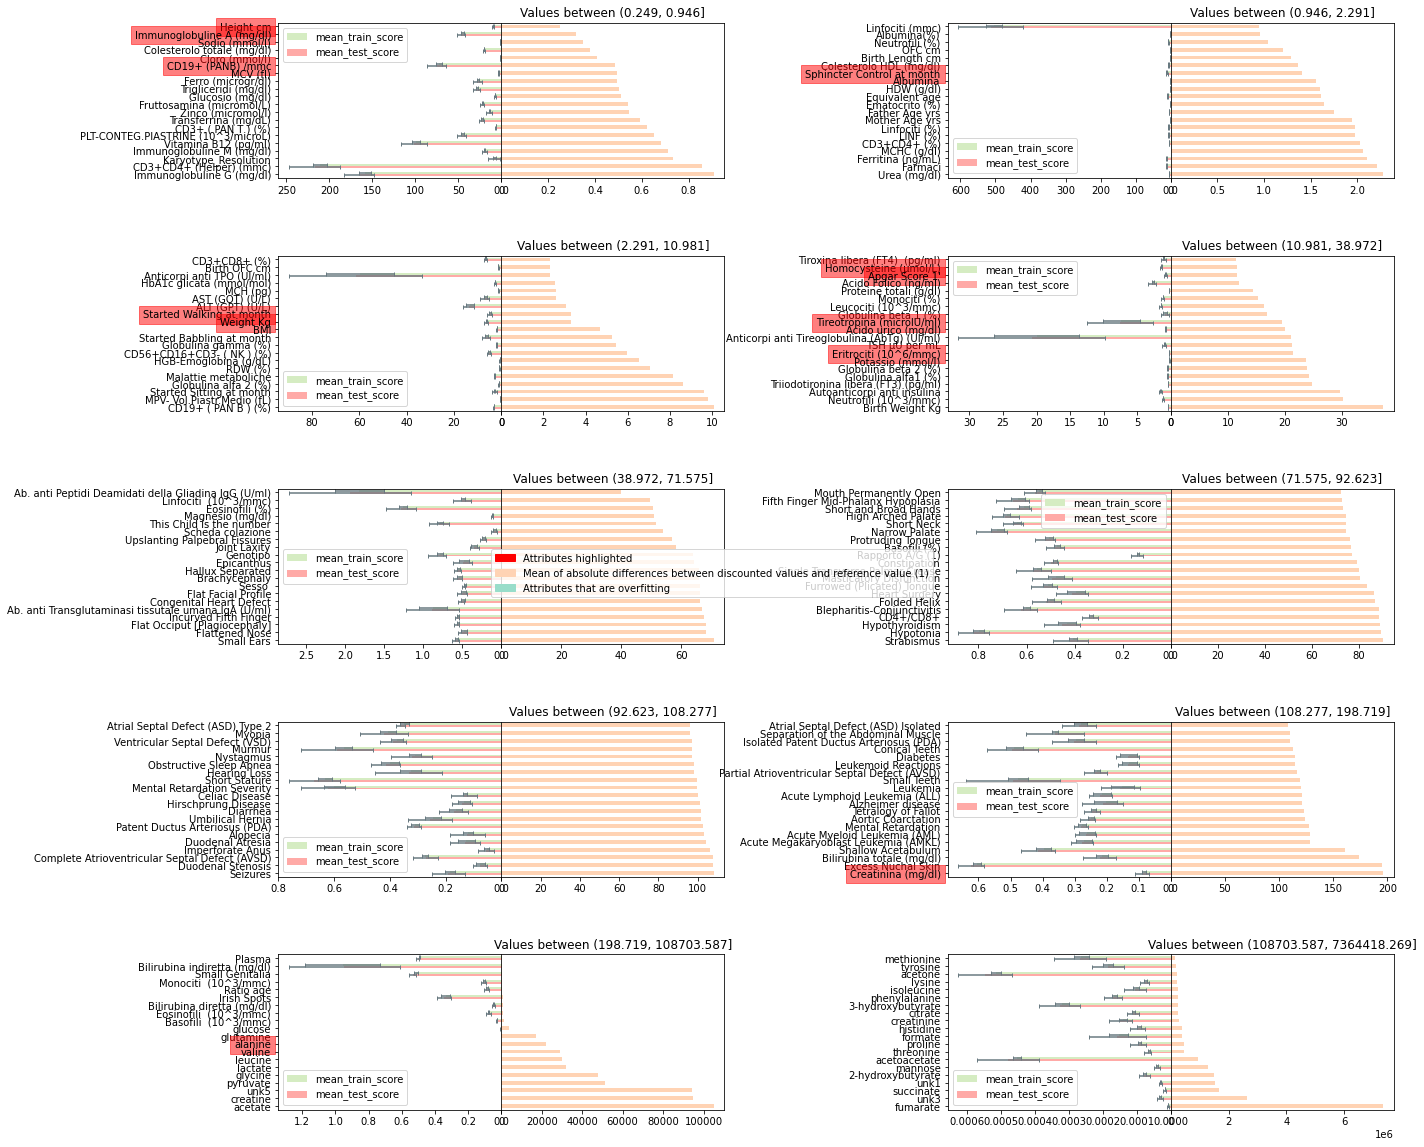

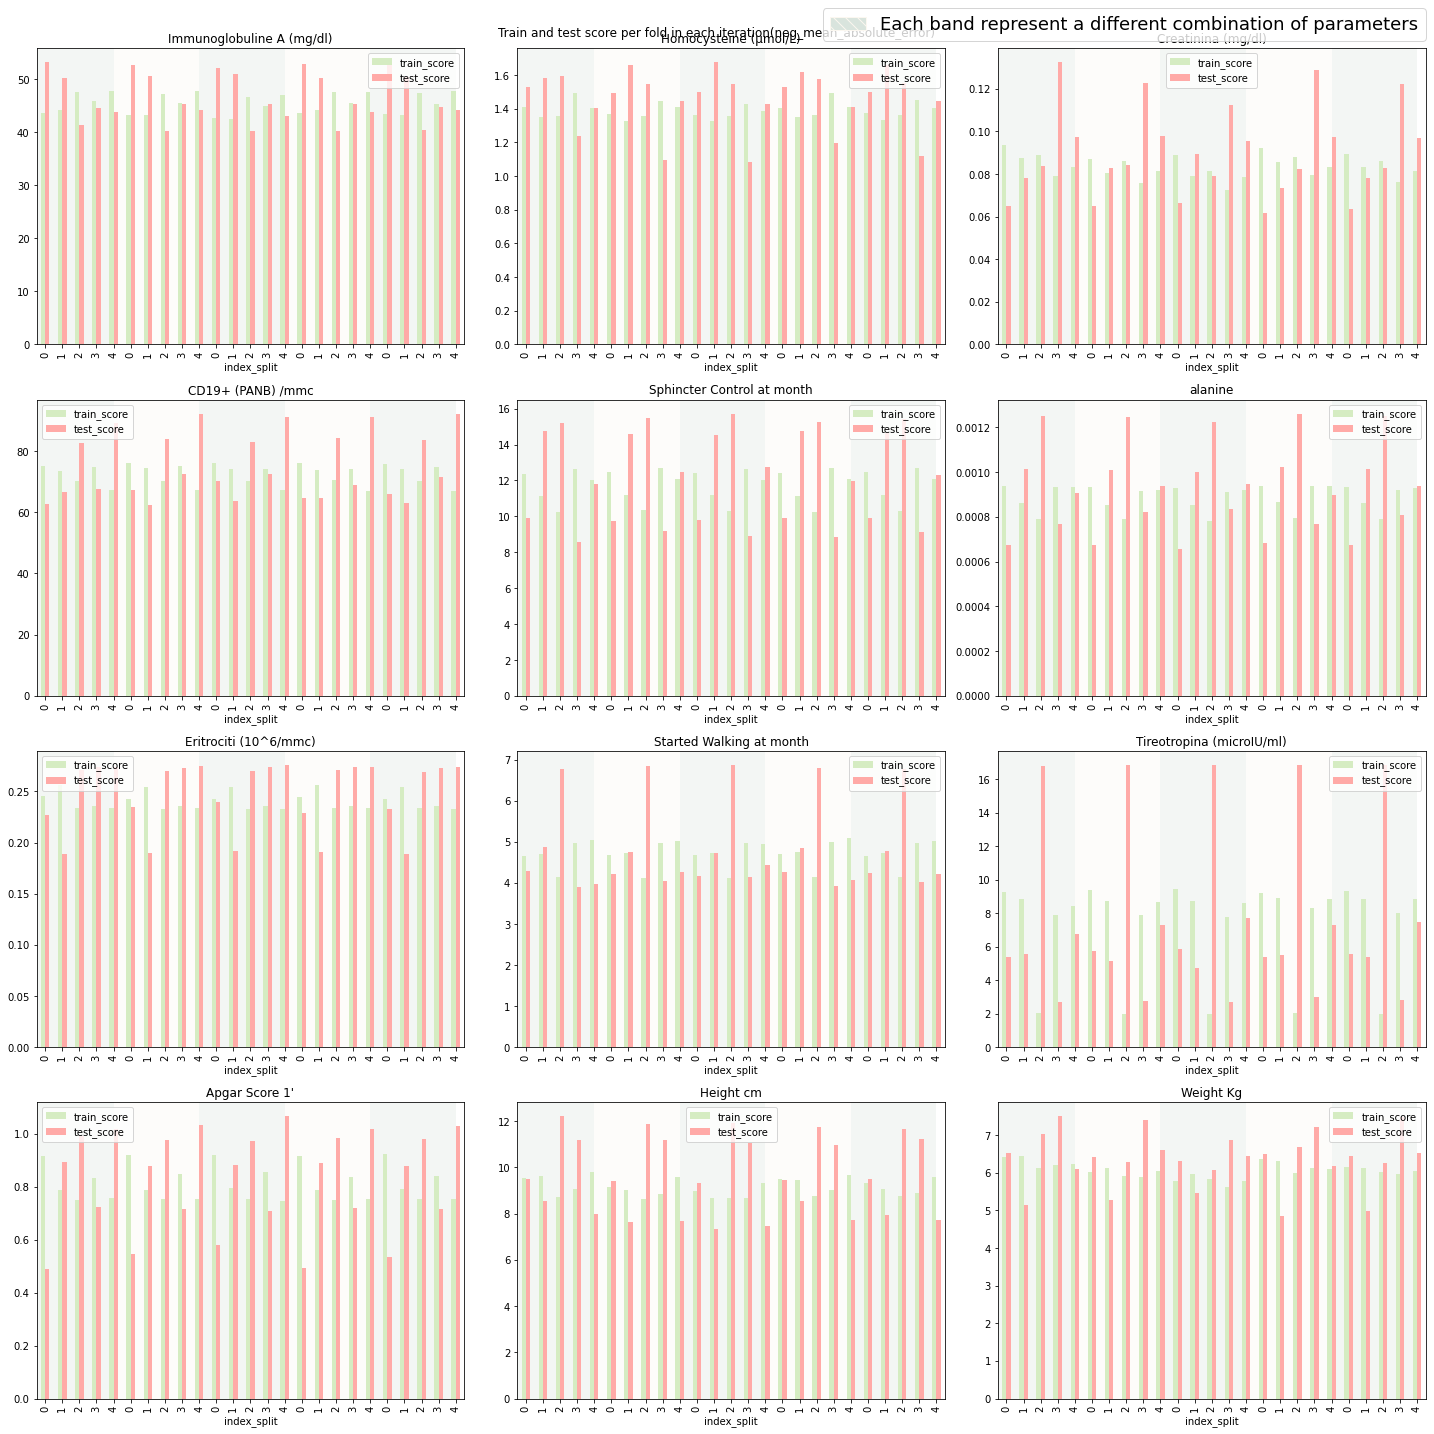

In [7]:
plot_ranked_with_overfitting(df_discounted_rfmae,act_rfmae,quantile=10,highlight_attributes=attributes_to_highlight, tol_overfitting=50)
plot_scores_splits(act_rfmae, highlight_attributes=attributes_to_highlight)

Extra tree using MAE

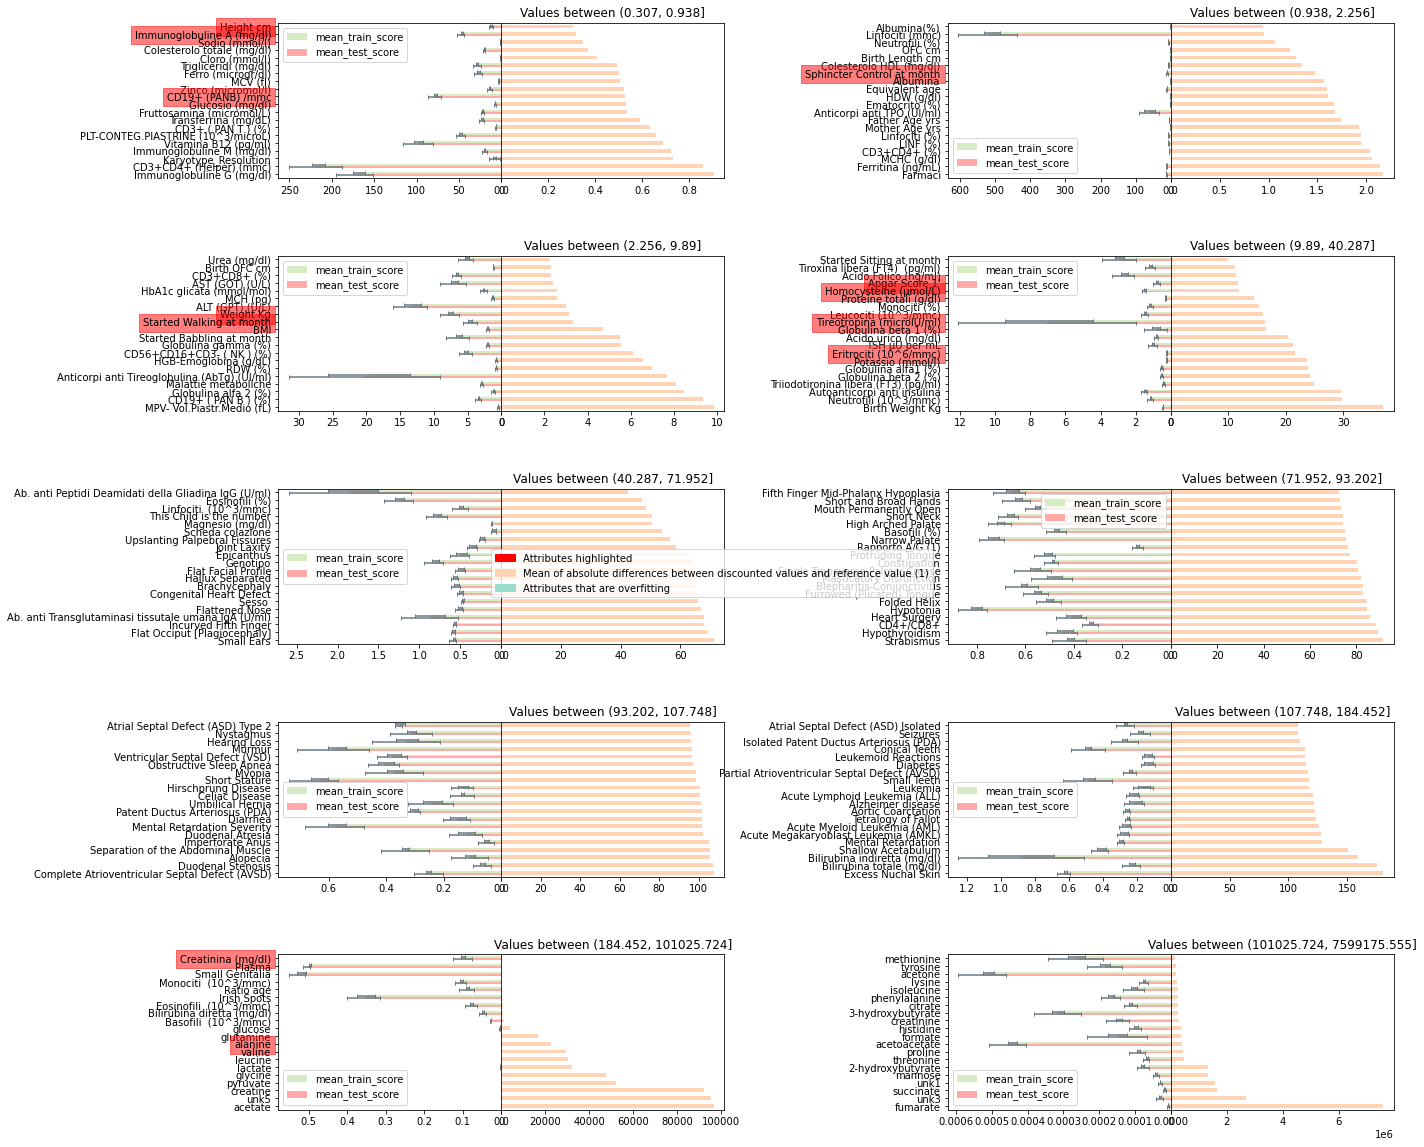

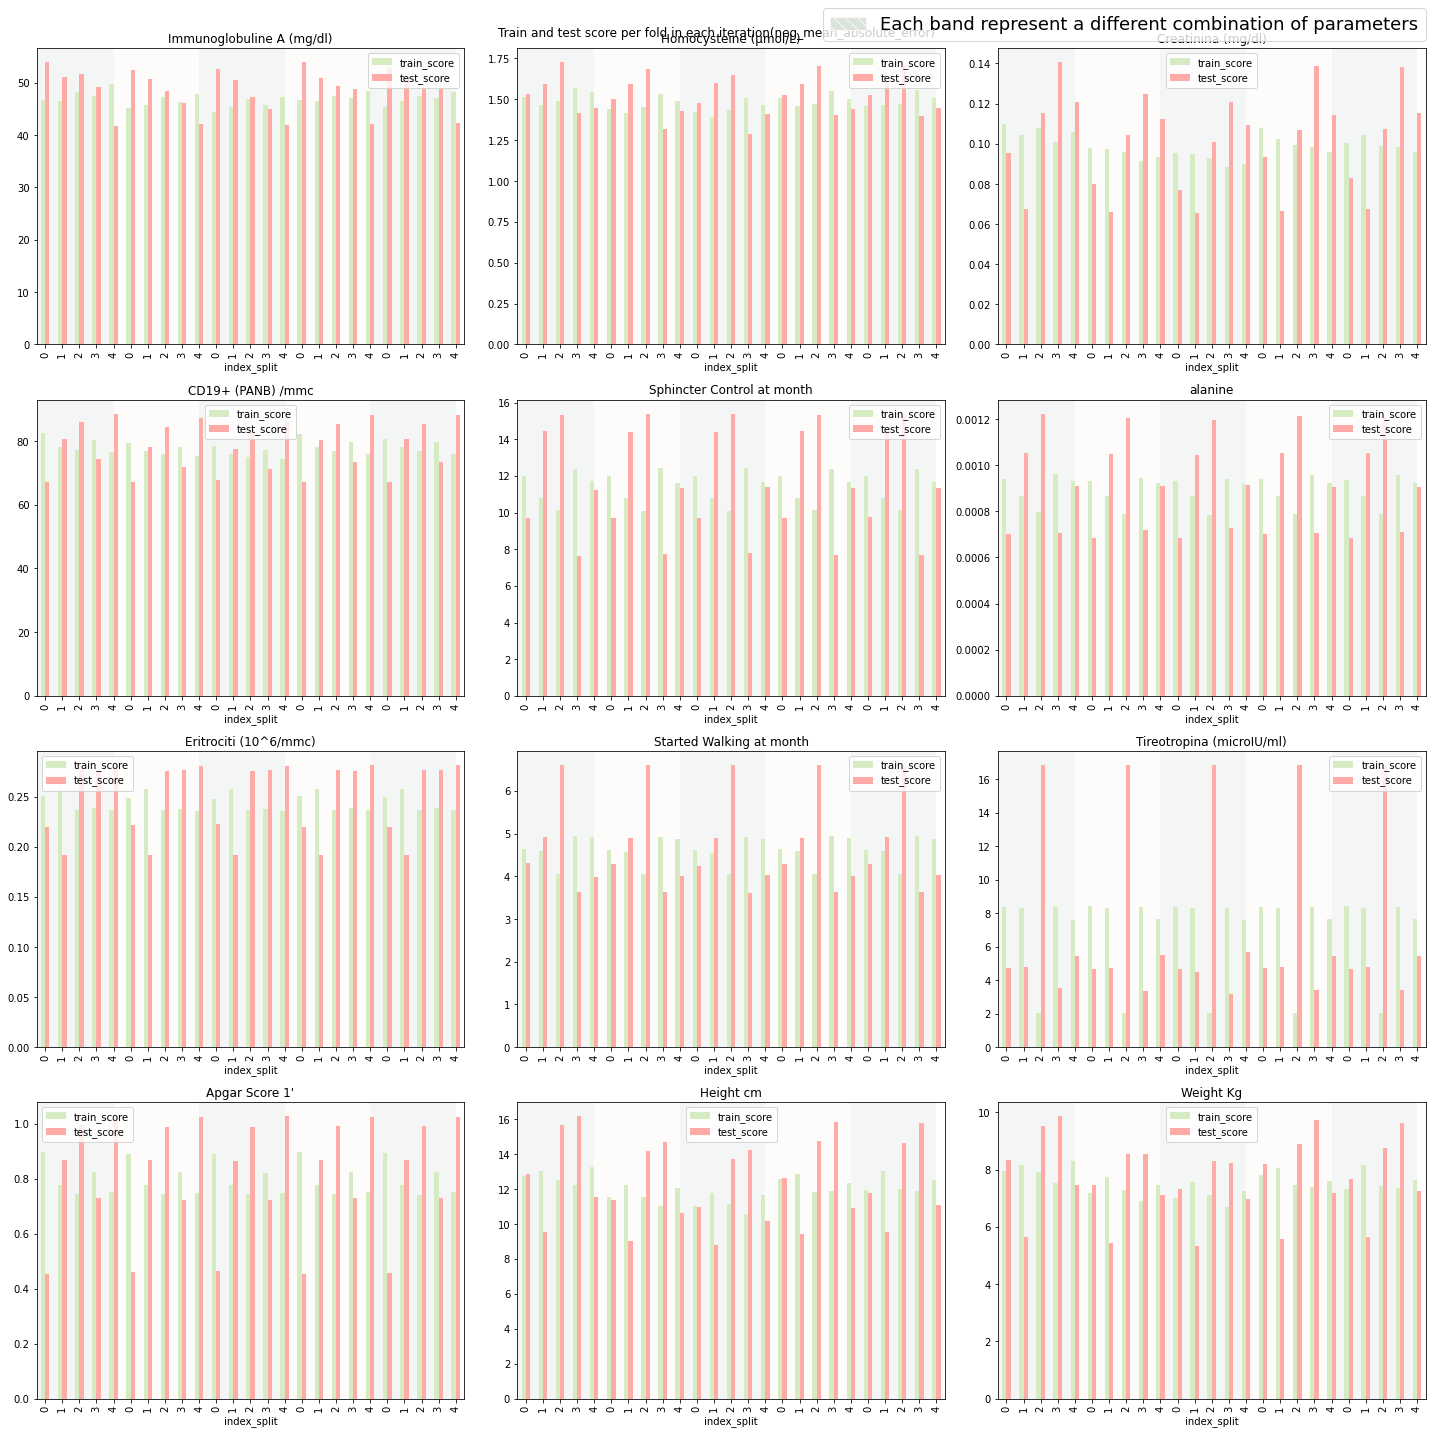

In [8]:
plot_ranked_with_overfitting(df_discounted_etmae,act_etmae,quantile=10,highlight_attributes=attributes_to_highlight, tol_overfitting=50)
plot_scores_splits(act_etmae, highlight_attributes=attributes_to_highlight)

Preditcions of **Immunoglobuline A (mg/dl)** using **Age (G+W)** 

Random Forest (baseline) with MSE 

Random Forest (baseline) with MAE 

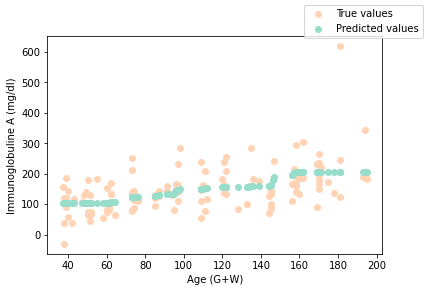

In [75]:
target_attribute = "Immunoglobuline A (mg/dl)"
plot_predictions(df_to_transform, act_rfb, input_attribute=input_attribute, target_attribute=target_attribute)

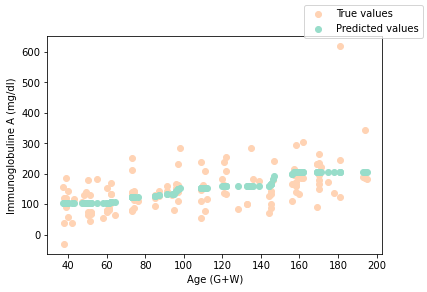

In [76]:
target_attribute = "Immunoglobuline A (mg/dl)"
plot_predictions(df_to_transform, act_rfmae, input_attribute=input_attribute, target_attribute=target_attribute)

In [106]:
act_rfb.attribute_information_[target_attribute].estimator

RandomForestRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=24,
                      n_estimators=38, n_jobs=-1, random_state=2020)

In [138]:
act_rfmae.attribute_information_[target_attribute].estimator

RandomForestRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=28,
                      n_estimators=29, n_jobs=-1, random_state=2020)

Extra Trees using MSE

Extra Trees using MAE

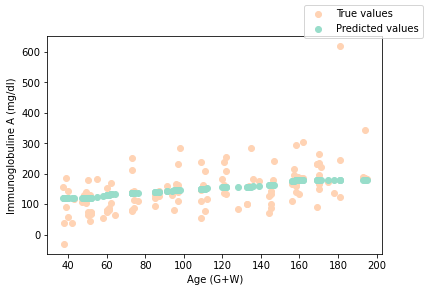

In [108]:
target_attribute = "Immunoglobuline A (mg/dl)"
plot_predictions(df_to_transform, act_etb, input_attribute=input_attribute, target_attribute=target_attribute)

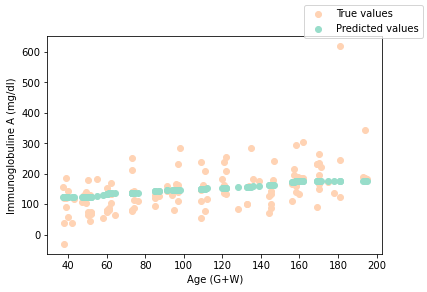

In [109]:
target_attribute = "Immunoglobuline A (mg/dl)"
plot_predictions(df_to_transform, act_etmae, input_attribute=input_attribute, target_attribute=target_attribute)

In [110]:
act_etb.attribute_information_[target_attribute].estimator

ExtraTreesRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=24,
                    n_estimators=38, n_jobs=-1, random_state=2020)

In [111]:
act_etmae.attribute_information_[target_attribute].estimator

ExtraTreesRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=28,
                    n_estimators=29, n_jobs=-1, random_state=2020)

Preditcions of **Weight Kg** using **Age (G+W)** 

Random Forest using MSE

Random Forest using MAE

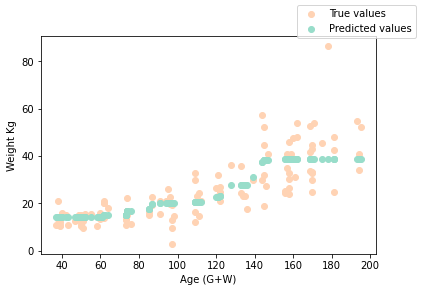

In [112]:
target_attribute = "Weight Kg"
plot_predictions(df_to_transform, act_rfb, input_attribute=input_attribute, target_attribute=target_attribute)

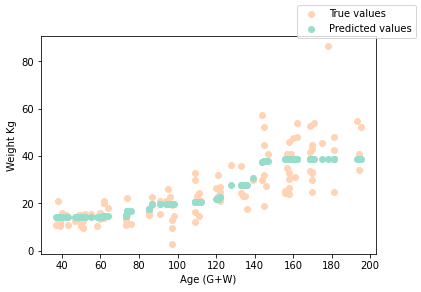

In [113]:
target_attribute = "Weight Kg"
plot_predictions(df_to_transform, act_rfmae, input_attribute=input_attribute, target_attribute=target_attribute)

In [114]:
act_rfb.attribute_information_[target_attribute].estimator

RandomForestRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=24,
                      n_estimators=38, n_jobs=-1, random_state=2020)

In [115]:
act_rfmae.attribute_information_[target_attribute].estimator

RandomForestRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=28,
                      n_estimators=29, n_jobs=-1, random_state=2020)

Extra Trees using MSE

Extra Trees using MAE

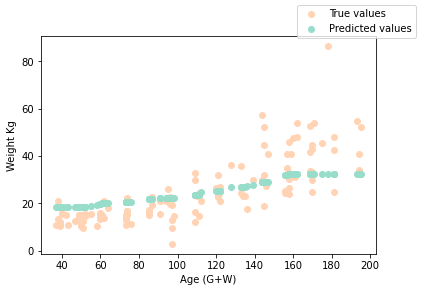

In [116]:
target_attribute = "Weight Kg"
plot_predictions(df_to_transform, act_etmae, input_attribute=input_attribute, target_attribute=target_attribute)

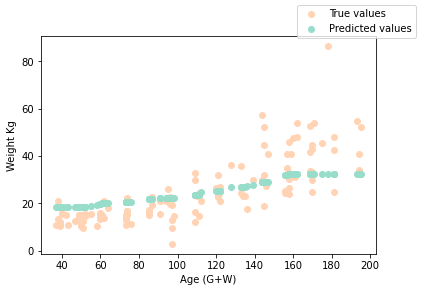

In [117]:
target_attribute = "Weight Kg"
plot_predictions(df_to_transform, act_etmae, input_attribute=input_attribute, target_attribute=target_attribute)

In [118]:
act_etb.attribute_information_[target_attribute].estimator

ExtraTreesRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=24,
                    n_estimators=38, n_jobs=-1, random_state=2020)

In [119]:
act_etmae.attribute_information_[target_attribute].estimator

ExtraTreesRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=28,
                    n_estimators=29, n_jobs=-1, random_state=2020)

Preditcions of **alanine** using **Age (G+W)** 

Random Forest using MSE

Random Forest using MAE

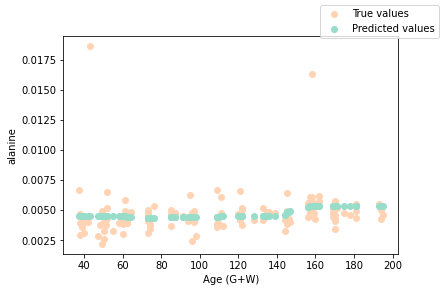

In [120]:
target_attribute = "alanine"
plot_predictions(df_to_transform, act_rfb, input_attribute=input_attribute, target_attribute=target_attribute)

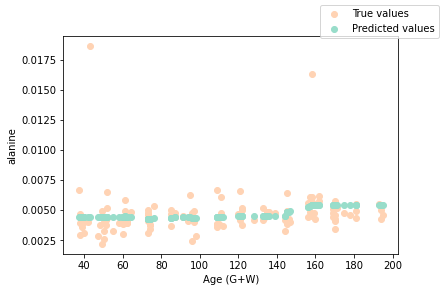

In [121]:
target_attribute = "alanine"
plot_predictions(df_to_transform, act_rfmae, input_attribute=input_attribute, target_attribute=target_attribute)

In [122]:
act_rfb.attribute_information_[target_attribute].estimator

RandomForestRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=24,
                      n_estimators=38, n_jobs=-1, random_state=2020)

In [123]:
act_rfmae.attribute_information_[target_attribute].estimator

RandomForestRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=28,
                      n_estimators=29, n_jobs=-1, random_state=2020)

Extra Trees using MSE

Extra Trees using MAE

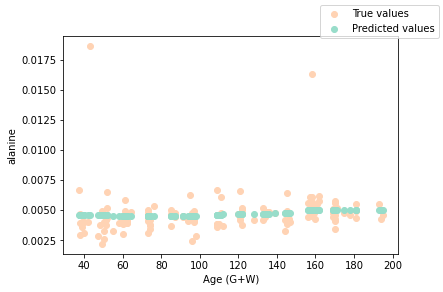

In [124]:
target_attribute = "alanine"
plot_predictions(df_to_transform, act_etb, input_attribute=input_attribute, target_attribute=target_attribute)

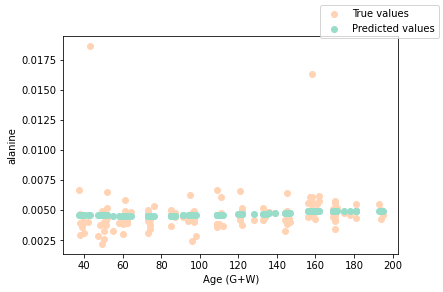

In [125]:
target_attribute = "alanine"
plot_predictions(df_to_transform, act_etmae, input_attribute=input_attribute, target_attribute=target_attribute)

In [126]:
act_etb.attribute_information_[target_attribute].estimator

ExtraTreesRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=24,
                    n_estimators=38, n_jobs=-1, random_state=2020)

In [127]:
act_etmae.attribute_information_[target_attribute].estimator

ExtraTreesRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=28,
                    n_estimators=29, n_jobs=-1, random_state=2020)

Preditcions of **Tireotropina (microIU/ml)** using **Age (G+W)** 

Random Forest using MSE

Random Forest using MAE

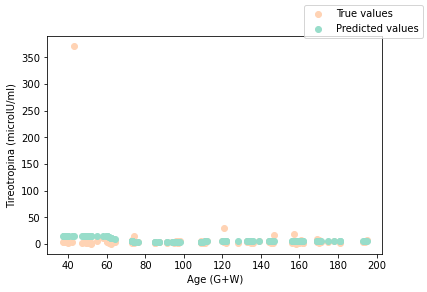

In [128]:
target_attribute = "Tireotropina (microIU/ml)"
plot_predictions(df_to_transform, act_rfb, input_attribute=input_attribute, target_attribute=target_attribute)

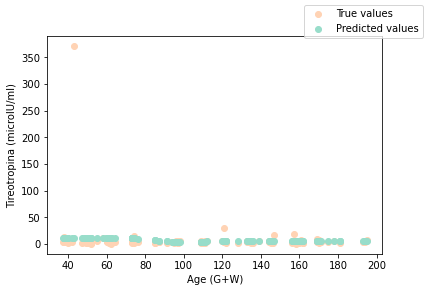

In [129]:
target_attribute = "Tireotropina (microIU/ml)"
plot_predictions(df_to_transform, act_rfmae, input_attribute=input_attribute, target_attribute=target_attribute)

In [130]:
act_rfb.attribute_information_[target_attribute].estimator

RandomForestRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=24,
                      n_estimators=38, n_jobs=-1, random_state=2020)

In [131]:
act_rfmae.attribute_information_[target_attribute].estimator

RandomForestRegressor(max_depth=5, min_samples_leaf=28, min_samples_split=23,
                      n_estimators=26, n_jobs=-1, random_state=2020)

Extra Trees using MSE

Extra Trees using MAE

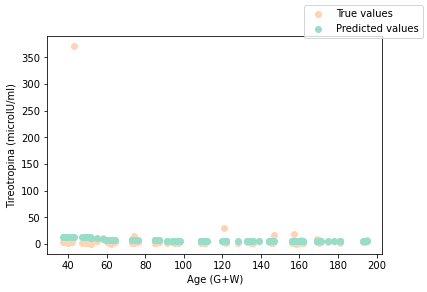

In [132]:
target_attribute = "Tireotropina (microIU/ml)"
plot_predictions(df_to_transform, act_etb, input_attribute=input_attribute, target_attribute=target_attribute)

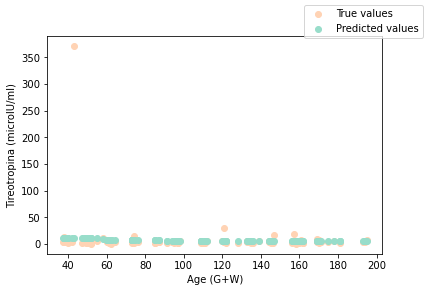

In [133]:
target_attribute = "Tireotropina (microIU/ml)"
plot_predictions(df_to_transform, act_etmae, input_attribute=input_attribute, target_attribute=target_attribute)

In [134]:
act_etb.attribute_information_[target_attribute].estimator

ExtraTreesRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=24,
                    n_estimators=38, n_jobs=-1, random_state=2020)

In [135]:
act_etmae.attribute_information_[target_attribute].estimator

ExtraTreesRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=28,
                    n_estimators=29, n_jobs=-1, random_state=2020)

Let's see the what features are selected by the *RandomForest* and *ExtraTrees* for predicting **Equivalent age**

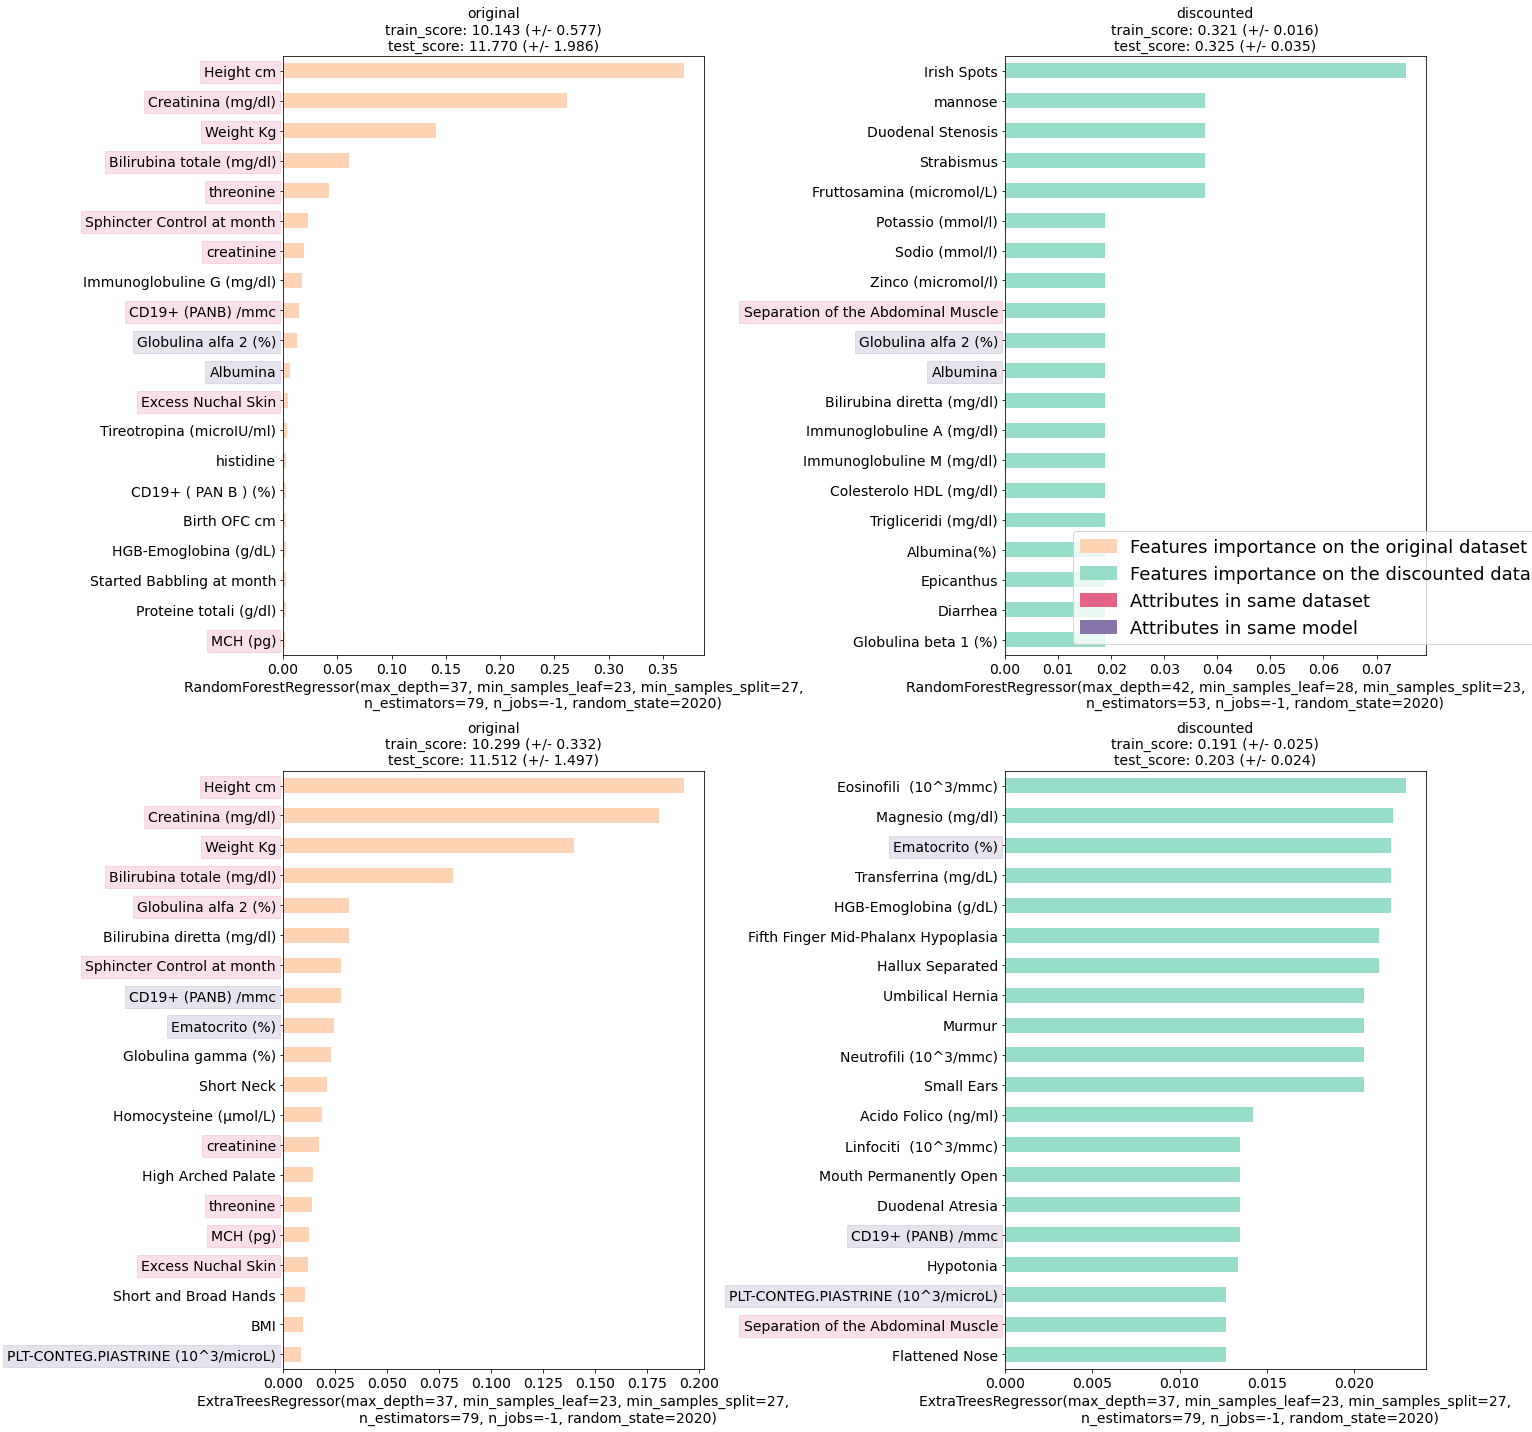

In [137]:
target_attribute = "Equivalent age"
excluded_attributes = ['Age (G+W)', 'Ratio age']
plot_features_importance(df_original=df_to_transform, df_discounted=df_discounted_etmae, 
                         target_attribute=target_attribute, scoring=act_etmae.scoring,
                         excluded_attributes=excluded_attributes)

# Conclusion

- Outliers will increase the MSE, hence it is better to use MAE.

- RandomForest and ExtraTrees are generalizing well attributes that should overfit. (e.g. Weight and Height )

- The age cancellation is effective since most of the attributes which depend on it are avoided within the discounted dataset

- An expert should assess which attributes for predicting **Equivalent age** in the discounted dataset are good

- Some examples:
>    - **Strabismus** and **separation of the abdominal muscle** [[1]]
>    - **Mouth permanently open** [[2]] [[3]] (*A tongue that tends to stick out of the mouth* and *Poor muscle tone or loose joints*) 
>    - **Fifth Finger Mid-Phalanx Hypoplasia** [[3]]
>    - **Small ears** [[4]]


[1] [2] :*Bruce Buehler MD - Chair of Pediatrics UNMC - Director of the Munroe Meyer Institute for Genetics and Rehabilitation*

[3]:*Sonographic demonstration of hypoplasia of the middle phalanx of the fifth digit: a finding associated with Down syndrome*

[4]:*Centers for Disease Control and Prevention*

[1]:https://www.unmc.edu/media/mmi/09Symposium/BuehlerSymposium09.pdf#page=12 
[2]:https://www.unmc.edu/media/mmi/09Symposium/BuehlerSymposium09.pdf#page=13
[3]:https://pubmed.ncbi.nlm.nih.gov/2969190/ 
[4]:https://www.cdc.gov/ncbddd/birthdefects/downsyndrome.html